In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

SAVE = True

base_dir = os.path.abspath("..")
results_dir = os.path.join(base_dir, "..", "results")
figures_dir = os.path.join(base_dir, "..", "figures")

gen_refs = pd.read_csv(os.path.join(results_dir, f"merged_gen_refs_vanilla_gpt-4_unique.csv"))
intro_refs = pd.read_csv(os.path.join(results_dir, f"merged_intro_refs_vanilla_gpt-4_unique.csv"))

gen_refs_iterative = pd.read_csv(os.path.join(results_dir, f"merged_gen_refs_vanilla_gpt-4_iterative_unique.csv"))
intro_refs_iterative = pd.read_csv(os.path.join(results_dir, f"merged_intro_refs_vanilla_gpt-4_iterative_unique.csv"))

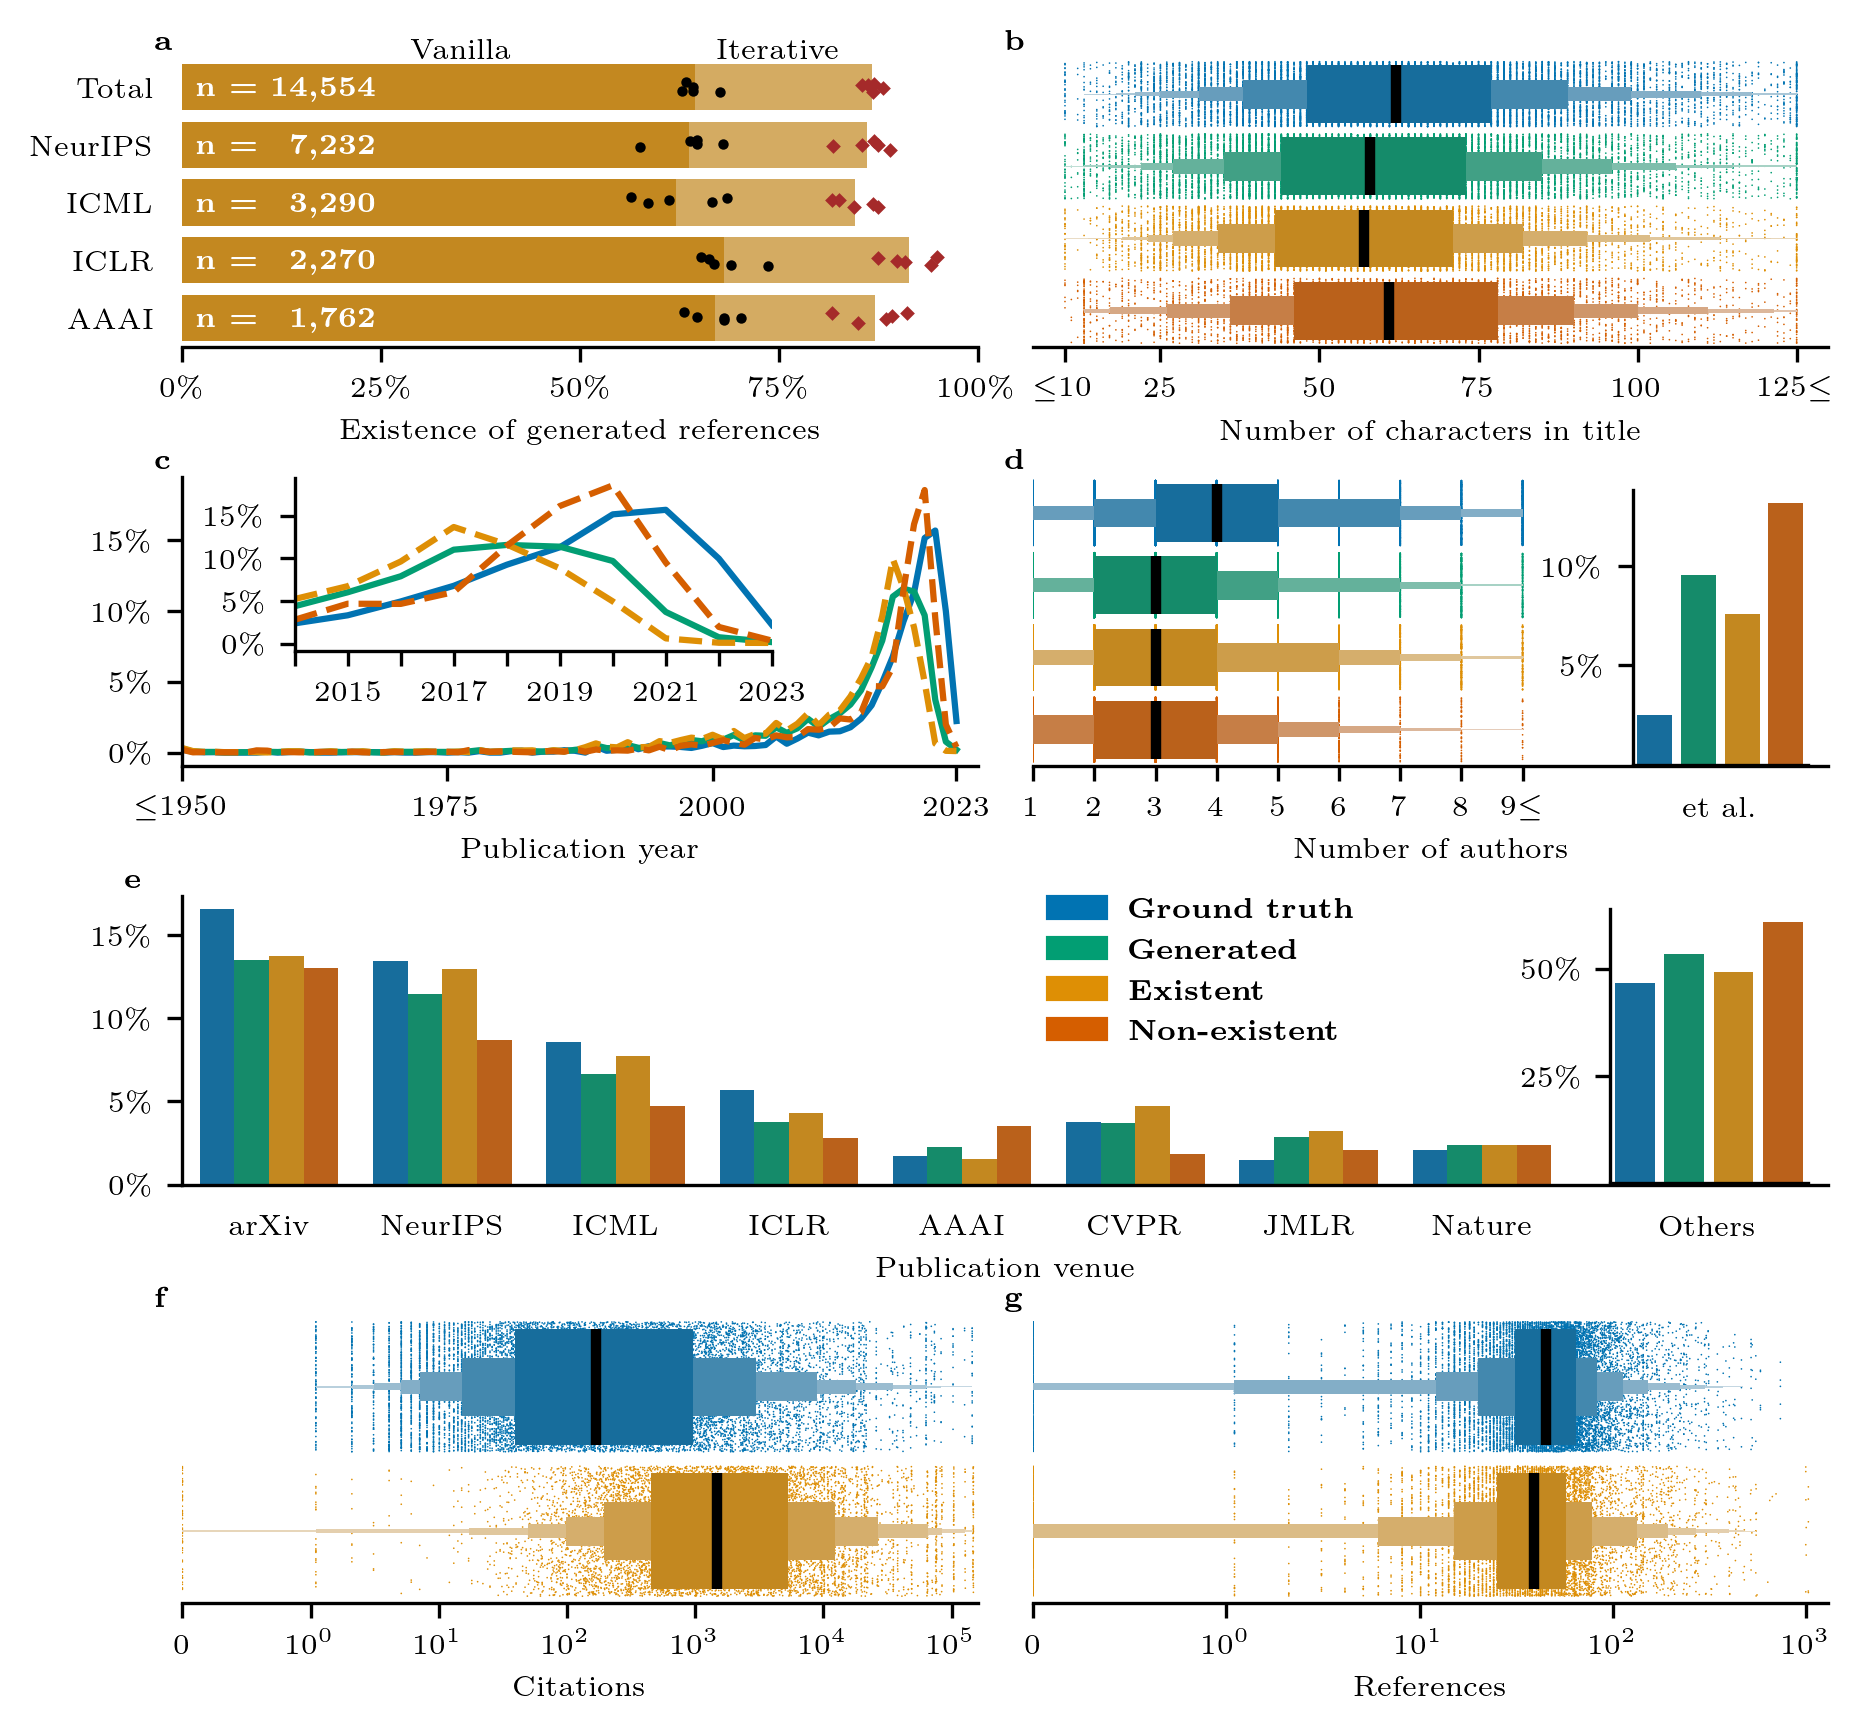

In [2]:
Figure1, ax1 = plt.subplot_mosaic(
    [
        ['A','A','C',"C"],
        ['B','B','D',"D"],
        ['E','E','E',"E"],
        ['F','F','G',"G"]
    ],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.15, 'hspace': 0.45}
)

### Plot 1: Existence
existence_vanilla = {"Total": gen_refs["Exists"].mean()}
existence_vanilla.update(gen_refs.groupby("Conference")["Exists"].mean().to_dict())
df_existence_vanilla = pd.DataFrame(list(existence_vanilla.items()), columns=['Venue', 'Score'])
df_existence_vanilla['Venue'] = pd.Categorical(
    df_existence_vanilla['Venue'],
    categories=["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ordered=True
)
df_existence_vanilla.sort_values('Venue', inplace=True)

existence_iterative = {"Total": gen_refs_iterative["Exists"].mean()}
existence_iterative.update(gen_refs_iterative.groupby("Conference")["Exists"].mean().to_dict())
df_existence_iterative = pd.DataFrame(list(existence_iterative.items()), columns=['Venue', 'Score'])
df_existence_iterative['Venue'] = pd.Categorical(
    df_existence_iterative['Venue'],
    categories=["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ordered=True
)
df_existence_iterative.sort_values('Venue', inplace=True)

data_existence_vanilla = gen_refs.groupby(["Conference", "strategy"])["Exists"].mean().reset_index()
data_total_existence_vanilla = gen_refs.groupby("strategy")["Exists"].mean().reset_index()
data_total_existence_vanilla.insert(0, "Conference", "Total")
data_existence_vanilla = pd.concat([data_existence_vanilla, data_total_existence_vanilla])

data_existence_iterative = gen_refs_iterative.groupby(["Conference", "strategy"])["Exists"].mean().reset_index()
data_total_existence_iterative = gen_refs_iterative.groupby("strategy")["Exists"].mean().reset_index()
data_total_existence_iterative.insert(0, "Conference", "Total")
data_existence_iterative = pd.concat([data_existence_iterative, data_total_existence_iterative])

sns.stripplot(
    data=data_existence_vanilla,
    x="Exists",
    y="Conference",
    color='black',
    size=2.5,
    order = ["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ax=ax1["A"],
)

sns.barplot(
    data=df_existence_vanilla,
    x="Score",
    y="Venue",
    color='#de8f05',
    order=["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ax=ax1["A"],
)

sns.stripplot(
    data=data_existence_iterative,
    x="Exists",
    y="Conference",
    marker="D",
    color='brown',
    size=2.5,
    order = ["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ax=ax1["A"],
)

sns.barplot(
    data=df_existence_iterative,
    x="Score",
    y="Venue",
    color='#de8f05',
    alpha=0.7,
    order = ["Total", "NeurIPS", "ICML", "ICLR", "AAAI"],
    ax=ax1["A"],
)

ax1["A"].annotate(r'Vanilla', xy=(0.35, -0.5), ha='center', fontsize=7)
ax1["A"].annotate(r'Iterative', xy=(0.75, -0.5), ha='center', fontsize=7)

ax1["A"].annotate(r'\textbf{n = 14,554}', xy=(0.13, 0.15), ha='center', fontsize=7, color="white")
ax1["A"].annotate(r'\textbf{n =  \, 7,232', xy=(0.13, 1.15), ha='center', fontsize=7, color="white")
ax1["A"].annotate(r'\textbf{n =  \, 3,290}', xy=(0.13, 2.15), ha='center', fontsize=7, color="white")
ax1["A"].annotate(r'\textbf{n =  \, 2,270}', xy=(0.13, 3.15), ha='center', fontsize=7, color="white")
ax1["A"].annotate(r'\textbf{n =  \, 1,762}', xy=(0.13, 4.15), ha='center', fontsize=7, color="white")

ax1["A"].tick_params(left=False)

ax1["A"].set_xlabel("Existence of generated references", fontsize=7)
ax1["A"].set(xlim=(0, 1))
ax1["A"].set_ylabel("", fontsize=7)
ax1["A"].set_yticks(ticks=[0,1,2,3,4], fontsize=7)
ax1["A"].set_yticklabels(labels=[r"\scriptsize{Total}",r"\scriptsize{NeurIPS}",r"\scriptsize{ICML}",r"\scriptsize{ICLR}", r"\scriptsize{AAAI}"], fontsize=7)
ax1["A"].set_xticks([0,0.25,0.50,0.75,1], labels=[r"0$\%$",r"25$\%$",r"50$\%$",r"75$\%$",r"100$\%$"], fontsize=7)
ax1["A"].set_title("")
ax1["A"].grid(False)

sns.despine(ax=ax1["A"],left=True, bottom=False)

### Plot 2: Publication year
starting_year = 1950
all_years = pd.date_range("1950", periods=2024-starting_year, freq="Y").year

gen_refs["_Publication Year"] = gen_refs["Publication Year"]
intro_refs["_Publication Year"] = intro_refs["Publication Year"]

gen_refs.loc[gen_refs["Publication Year"] <= starting_year, "_Publication Year"] = starting_year
intro_refs.loc[intro_refs["Publication Year"] <= starting_year, "_Publication Year"] = starting_year

intro_year = intro_refs["_Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)
gen_year = gen_refs["_Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)
exist_year = gen_refs[gen_refs["Exists"] == 1]["_Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)
non_exist_year = gen_refs[gen_refs["Exists"] == 0]["_Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)

intro_year = intro_year / intro_year.sum()
gen_year = gen_year / gen_year.sum()
exist_year = exist_year / exist_year.sum()
non_exist_year = non_exist_year / non_exist_year.sum()

sns.lineplot(x=all_years, y=intro_year, color='#0173b2', linewidth=1.5, ax=ax1["B"])
sns.lineplot(x=all_years, y=gen_year, color='#029e73', linewidth=1.5, ax=ax1["B"])
sns.lineplot(x=all_years, y=exist_year, color='#de8f05', linewidth=1.5, linestyle='--', ax=ax1["B"])
sns.lineplot(x=all_years, y=non_exist_year, color='#d55e00', linewidth=1.5, linestyle='--', ax=ax1["B"])

ax1["B"].set(xlim=(starting_year,2025))
ax1["B"].set_xlabel("Publication year", fontsize=7)
ax1["B"].set_ylabel("")
ax1["B"].set_xticks(ticks=[1950, 1975, 2000, 2023], labels=[r"$\small\leq$1950","1975", "2000", "2023"], fontsize=7)
ax1["B"].set_yticks([0,0.05,0.10,0.15], labels=[r"0$\%$",r"5$\%$",r"10$\%$",r"15$\%$"], fontsize=7)
ax1["B"].set_title("")
sns.despine(ax=ax1["B"],left=False, bottom=False)

# side plot with zoom-in
year_zoom_ax = inset_axes(
    ax1["B"], width="60%", height="60%", loc='upper left',
    bbox_to_anchor=(0.115, 0.07, 1, 1), bbox_transform=ax1['B'].transAxes
)

sns.lineplot(x=all_years[-10:], y=intro_year[-10:], color='#0173b2', linewidth=1.5, ax=year_zoom_ax)
sns.lineplot(x=all_years[-10:], y=gen_year[-10:], color='#029e73', linewidth=1.5, ax=year_zoom_ax)
sns.lineplot(x=all_years[-10:], y=exist_year[-10:], color='#de8f05', linewidth=1.5, linestyle='--', ax=year_zoom_ax)
sns.lineplot(x=all_years[-10:], y=non_exist_year[-10:], color='#d55e00', linewidth=1.5, linestyle='--', ax=year_zoom_ax)

year_zoom_ax.set(xlim=(2014, 2023))
year_zoom_ax.set_xlabel("", fontsize=7)
year_zoom_ax.set_ylabel("")
year_zoom_ax.set_xticks(ticks=list(range(2014, 2024)), labels=["","2015","","2017","","2019","","2021","", "2023"], fontsize=7)
year_zoom_ax.set_yticks([0,0.05,0.10,0.15], labels=[r"0$\%$",r"5$\%$",r"10$\%$",r"15$\%$"], fontsize=7)
year_zoom_ax.set_title("")
sns.despine(ax=year_zoom_ax,left=False, bottom=False)

### Plot 3: Character length
intro_length = intro_refs["Title Length"].to_frame()
intro_length["Category"] = "intro"
gen_length = gen_refs["Title Length"].to_frame()
gen_length["Category"] = "gen"
exist_length = gen_refs.loc[gen_refs["Exists"] == 1.0, "Title Length"].to_frame()
exist_length["Category"] = "exist"
not_exist_length = gen_refs.loc[gen_refs["Exists"] == 0.0, "Title Length"].to_frame()
not_exist_length["Category"] = "not_exist"

df_length = pd.concat(
    [intro_length, gen_length, exist_length, not_exist_length],
    ignore_index=True
)

df_length.loc[df_length["Title Length"] < 10, "Title Length"] = 10
df_length.loc[df_length["Title Length"] > 125, "Title Length"] = 125

sns.stripplot(
    data=df_length,
    x="Title Length",
    y="Category",
    ax=ax1["C"],
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    order=["intro", "gen", "exist", "not_exist"],
    size=0.4,
    jitter=0.45,
    hue="Category",
    zorder=0,
)

sns.boxenplot(
    data=df_length,
    x="Title Length",
    y="Category",
    ax=ax1["C"],
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    order=["intro", "gen", "exist", "not_exist"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
)

ax1["C"].set(xlim=(5,130))
ax1["C"].set_xlabel("Number of characters in title", fontsize=7)
ax1["C"].set_ylabel("")
ax1["C"].set_xticks(ticks=[10,25,50,75,100,125], labels=[r"$\small \leq$10","25","50","75","100",r"125$ \small \leq$"], fontsize=7)
ax1["C"].set_yticks("")
ax1["C"].set_title("")
sns.despine(ax=ax1["C"],left=True, bottom=False)

### Plot 4: Number of authors
intro_authors = intro_refs["Number of Authors"].to_frame()
intro_authors["Category"] = "intro"
gen_authors = gen_refs["Number of Authors"].to_frame()
gen_authors["Category"] = "gen"
exist_authors = gen_refs.loc[gen_refs["Exists"] == 1.0, "Number of Authors"].to_frame()
exist_authors["Category"] = "exist"
not_exist_authors = gen_refs.loc[gen_refs["Exists"] == 0.0, "Number of Authors"].to_frame()
not_exist_authors["Category"] = "not_exist"

df_authors = pd.concat(
    [intro_authors, gen_authors, exist_authors, not_exist_authors],
    ignore_index=True
)

etal_mask = df_authors["Number of Authors"] == "et al."
etal = df_authors[etal_mask]

etal_authors = etal.groupby("Category").size() / df_authors.groupby("Category").size()
etal_authors.dropna(inplace=True)
etal_authors = etal_authors.reindex(["intro", "gen", "exist", "not_exist"])

df_authors = df_authors[~etal_mask]

df_authors["Number of Authors"] = df_authors["Number of Authors"].astype(float)
df_authors.loc[df_authors["Number of Authors"] >= 9, "Number of Authors"] = 9

sns.stripplot(
    data=df_authors,
    x="Number of Authors",
    y="Category",
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    order=["intro", "gen", "exist", "not_exist"],
    hue="Category",
    size=0.4,
    jitter=0.45,
    ax=ax1["D"],
    zorder=0,
)

sns.boxenplot(
    data=df_authors,
    x="Number of Authors",
    y="Category",
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    order=["intro", "gen", "exist", "not_exist"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
    ax=ax1["D"],
)

ax1["D"].set(xlim=(1,14))
ax1["D"].set_xlabel("Number of authors", fontsize=7)
ax1["D"].set_ylabel("")
ax1["D"].set_xticks(ticks=[1,2,3,4,5,6,7,8,9], labels=["1","2","3","4","5","6","7","8",r"9$\small \leq$"], fontsize=7)
# ax1["D"].set_yticks(ticks=[1.5], labels=["Number of Authors"], fontsize="7")
ax1["D"].set_yticks([])
ax1["D"].set_title("")
sns.despine(ax=ax1["D"],left=True, bottom=False)

# side plot with et al.
etal_ax = inset_axes(
    ax1["D"], width="22%", height="95%", loc='lower right',
    bbox_to_anchor=(0, -0.068, 1, 1), bbox_transform=ax1['D'].transAxes
)

sns.barplot(
    x=etal_authors.index.to_list(),
    y=etal_authors.values,
    palette=["#0173b2", "#de8f05", "#029e73", "#d55e00"],
    order=["intro", "gen", "exist", "not_exist"],
    hue=etal_authors.values,
    ax=etal_ax,
)

etal_ax.get_legend().set_visible(False)

etal_ax.set_xlabel("et al.", fontsize=7)
etal_ax.set_ylabel("")
etal_ax.set_xticks("")
etal_ax.set_yticks([0.05,0.10], labels=[r"5$\%$",r"10$\%$"], fontsize=7)
etal_ax.set_title("")
sns.despine(ax=etal_ax,left=False, bottom=False)

### Plot 5: Publication venues
intro_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
gen_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
exist_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
not_exist_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}

for journal in intro_journals.keys():
    intro_journals[journal] = intro_refs["Publication Venue_processed"].isin([journal]).sum() / len(intro_refs)
    gen_journals[journal] = gen_refs["Publication Venue_processed"].isin([journal]).sum() / len(gen_refs)
    exist_journals[journal] = gen_refs.loc[gen_refs["Exists"] == 1.0, "Publication Venue_processed"].isin([journal]).sum() / len(gen_refs.loc[gen_refs["Exists"] == 1.0])
    not_exist_journals[journal] = gen_refs.loc[gen_refs["Exists"] == 0.0, "Publication Venue_processed"].isin([journal]).sum() / len(gen_refs.loc[gen_refs["Exists"] == 0.0])

df = pd.DataFrame([intro_journals, gen_journals, exist_journals, not_exist_journals])
df = df.T
df.columns = ["intro", "gen", "exist", "not_exist"]
df = df.reset_index()
df = df.rename(columns={'index': 'Journals'})
df_melted = df.melt(id_vars='Journals', var_name='Type', value_name='Value')

sns.barplot(
    x='Journals',
    y='Value',
    hue='Type',
    data=df_melted,
    hue_order=["intro", "gen", "exist", "not_exist"],
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    ax=ax1["E"],
)

ax1["E"].legend().set_visible(False)
ax1["E"].tick_params(bottom=False)

ax1["E"].set(xlim=(-0.5,9))
ax1["E"].set_xlabel("Publication venue", fontsize=7)
ax1["E"].set_ylabel("")
ax1['E'].set_xticks(ticks=[0,1,2,3,4,5,6,7], fontsize=7)
ax1['E'].set_xticklabels(labels=[r"\scriptsize{arXiv}",r"\scriptsize{NeurIPS}", r"\scriptsize{ICML}", r"\scriptsize{ICLR}",
                                 r"\scriptsize{AAAI}",r"\scriptsize{CVPR}",r"\scriptsize{JMLR}",r"\scriptsize{Nature}"], fontsize=7)
ax1["E"].set_yticks([0,0.05,0.10,0.15], labels=[r"0$\%$",r"5$\%$",r"10$\%$",r"15$\%$"], fontsize=7)
ax1["E"].set_title("")
sns.despine(ax=ax1["E"],left=False, bottom=False)

# side plot with others
other_journals = [
    1 - sum(intro_journals.values()),
    1 - sum(gen_journals.values()),
    1 - sum(exist_journals.values()),
    1 - sum(not_exist_journals.values())
]

others_df = pd.DataFrame([other_journals, ["intro", "gen", "exist", "not_exist"]]).T
others_df.columns = ["Value", "Type"]

others_ax = inset_axes(
    ax1["D"], width="12%", height="95%", loc='lower right',
    bbox_to_anchor=(0, -0.068, 1, 1), bbox_transform=ax1["E"].transAxes
)

sns.barplot(
    data=others_df,
    x="Type",
    y="Value",
    palette=["#0173b2", "#029e73", "#de8f05", "#d55e00"],
    ax=others_ax,
    order=["intro", "gen", "exist", "not_exist"],
    hue="Type",
)

others_ax.set_xlabel("Others", fontsize=7)
others_ax.set_ylabel("")
others_ax.set_xticks("")
others_ax.set_yticks([0.25,0.50], labels=[r"25$\%$",r"50$\%$"], fontsize=7)
others_ax.set_title("")
sns.despine(ax=others_ax,left=False, bottom=False)

### Plot 6: Citations
intro_citations = intro_refs["Citation Count_sch"].to_frame() # gen_refs["Exists"] == 1.0, 
intro_citations["Category"] = "intro"
exist_citations = gen_refs.loc[gen_refs["Exists"] == 1.0, "Citation Count_sch"].to_frame()
exist_citations["Category"] = "exist"

df_citations = pd.concat(
    [intro_citations, exist_citations],
    ignore_index=True
)
df_citations["Citation Count_sch"] += 0.1

sns.stripplot(
    data=df_citations,
    x="Citation Count_sch",
    y="Category",
    palette=['#0173b2', '#de8f05'],
    order=["intro", "exist"],
    size=0.4,
    jitter=0.45,
    hue="Category",
    ax=ax1["F"],
    log_scale=True,
    zorder=0,
)

sns.boxenplot(
    data=df_citations,
    x="Citation Count_sch",
    y="Category",
    palette=['#0173b2', '#de8f05'],
    order=["intro", "exist"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
    ax=ax1["F"],
    log_scale=True,
)

ax1["F"].set(xlim=(0.1,160000))
ax1["F"].set_xlabel("Citations", fontsize = 7)
ax1["F"].set_ylabel("")
ax1["F"].set_xticks(ticks=[0.1, 1, 10, 100, 1000, 10000, 100000], labels=["0", r"$10^0$", r"$10^1$", "$10^2$", "$10^3$", "$10^4$", "$10^5$"], fontsize=7)
ax1["F"].set_yticks("")
ax1["F"].set_title("")
sns.despine(ax=ax1["F"],left=True, bottom=False)

### Plot 7: References
intro_references = intro_refs["Reference Count_sch"].to_frame() # gen_refs["Exists"] == 1.0, 
intro_references["Category"] = "intro"
exist_references = gen_refs.loc[gen_refs["Exists"] == 1.0, "Reference Count_sch"].to_frame()
exist_references["Category"] = "exist"

df_references = pd.concat(
    [intro_references, exist_references],
    ignore_index=True
)
df_references["Reference Count_sch"] += 0.1

sns.stripplot(
    data=df_references,
    x="Reference Count_sch",
    y="Category",
    palette=['#0173b2', '#de8f05'],
    order=["intro", "exist"],
    size=0.4,
    jitter=0.45,
    hue="Category",
    ax=ax1["G"],
    log_scale=True,
    zorder=0,
)

sns.boxenplot(
    data=df_references,
    x="Reference Count_sch",
    y="Category",
    palette=['#0173b2', '#de8f05'],
    order=["intro", "exist"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
    ax=ax1["G"],
    log_scale=True,
)

ax1["G"].set(xlim=(0.1,1300))
ax1["G"].set_xlabel("References", fontsize = 7)
ax1["G"].set_ylabel("")
ax1["G"].set_xticks(ticks=[0.1, 1, 10, 100, 1000], labels=["0", r"$10^0$", r"$10^1$", "$10^2$", "$10^3$"], fontsize=7)
ax1["G"].set_yticks("")
ax1["G"].set_title("")
sns.despine(ax=ax1["G"],left=True, bottom=False)

from matplotlib.ticker import NullLocator
ax1["G"].xaxis.set_minor_locator(NullLocator())

# Legend
labels = [
    r'\textbf{Ground truth}',
    r'\textbf{Generated}',
    r'\textbf{Existent}',
    r'\textbf{Non-existent}'
]

patch_handle_1 = Patch(color='#0173b2')
patch_handle_2 = Patch(color='#029e73')
patch_handle_3 = Patch(color='#de8f05')
patch_handle_4 = Patch(color='#d55e00')

handles = [patch_handle_1, patch_handle_2, patch_handle_3, patch_handle_4]
Figure1.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.52, 0.475),
               frameon=False, bbox_transform=Figure1.transFigure, fontsize=7)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': r'\textbf{c}',
    'C': r'\textbf{b}',
    'D': r'\textbf{d}',
    'E': r'\textbf{e}',
    'F': r'\textbf{f}',
    'G': r'\textbf{g}',
}

# Annotate each subplot
for key, ax in ax1.items():
    ax.text(-0.035, 1.10, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')

if SAVE:
    plt.savefig(os.path.join(figures_dir, "Main_fig_2.pdf"), bbox_inches="tight")